In [1]:
#Importing necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data=pd.read_csv("black_friday_train.csv")

In [3]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
#create fuctions to conduct hypothesis testing
#Null hypothesis = There is no relationship exits between feature and target
#Alternative hypothesis=There is some relationship exits between feature and target
def anova_test(x,y):
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    formula='{0} ~ {1}'.format(x,y)
    model=ols(formula,data=data).fit()
    anova_result=sm.stats.anova_lm(model,typ=2)
    anova_result.dropna(inplace=True,axis=0)
    for i in anova_result["PR(>F)"]:
        if i<0.05:
            print("Relationship exits")
        else:
            print("No relationship")

<AxesSubplot:xlabel='Product_Category_2'>

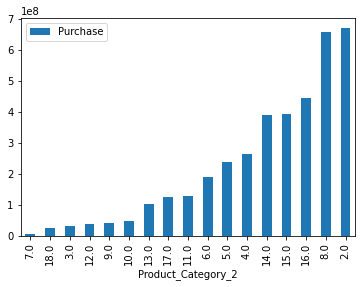

In [6]:
data[["Product_Category_2","Purchase"]].groupby("Product_Category_2").sum().sort_values(by=["Purchase"]).plot(kind="bar")

<AxesSubplot:xlabel='Product_Category_2'>

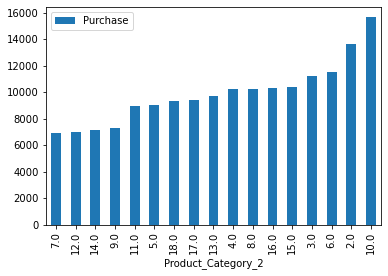

In [7]:
data[["Product_Category_2","Purchase"]].groupby("Product_Category_2").mean().sort_values(by=["Purchase"]).plot(kind="bar")

In [8]:
anova_test('data["Product_Category_2"]','data["Purchase"]')

Relationship exits


<AxesSubplot:xlabel='Product_Category_3'>

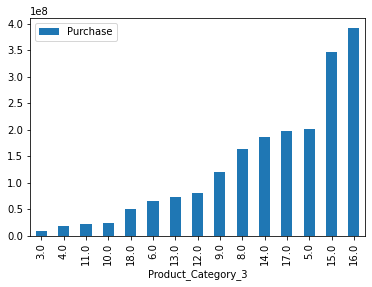

In [9]:
data[["Product_Category_3","Purchase"]].groupby("Product_Category_3").sum().sort_values(by=["Purchase"]).plot(kind="bar")

<AxesSubplot:xlabel='Product_Category_3'>

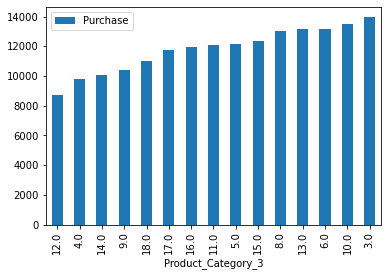

In [10]:
data[["Product_Category_3","Purchase"]].groupby("Product_Category_3").mean().sort_values(by=["Purchase"]).plot(kind="bar")

In [11]:
anova_test('data["Product_Category_3"]','data["Purchase"]')

Relationship exits


<AxesSubplot:xlabel='Product_Category_1'>

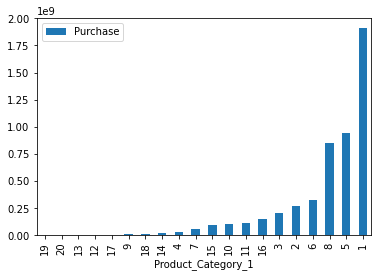

In [12]:
data[["Product_Category_1","Purchase"]].groupby("Product_Category_1").sum().sort_values(by=["Purchase"]).plot(kind="bar")

<AxesSubplot:xlabel='Product_Category_1'>

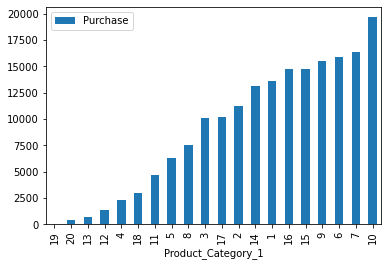

In [13]:
data[["Product_Category_1","Purchase"]].groupby("Product_Category_1").mean().sort_values(by=["Purchase"]).plot(kind="bar")

In [14]:
anova_test('data["Product_Category_1"]','data["Purchase"]')

Relationship exits


In [15]:
data.drop(["User_ID","Product_ID","Product_Category_2","Product_Category_3"],axis=1,inplace=True)

C:\Users\preth\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

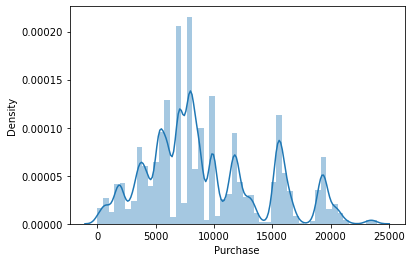

In [16]:
sns.distplot(data["Purchase"])

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

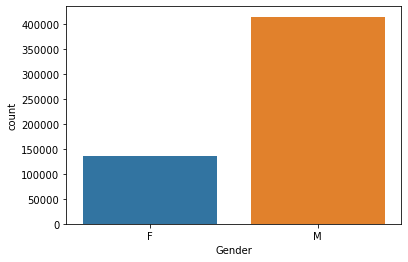

In [17]:
sns.countplot(data["Gender"])

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

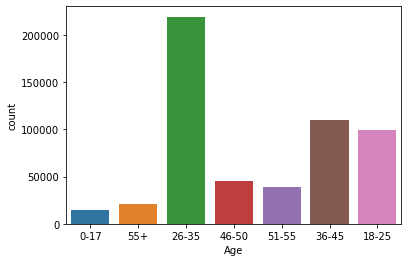

In [18]:
sns.countplot(data["Age"])

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

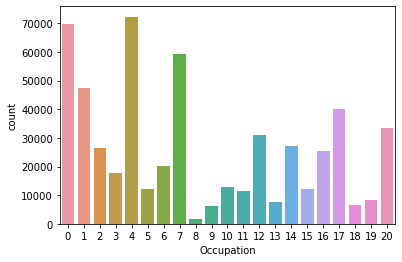

In [19]:
sns.countplot(data["Occupation"])

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City_Category', ylabel='count'>

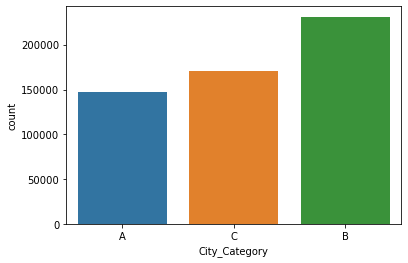

In [20]:
sns.countplot(data["City_Category"])

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

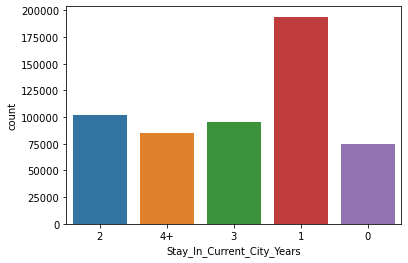

In [21]:
sns.countplot(data["Stay_In_Current_City_Years"])

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

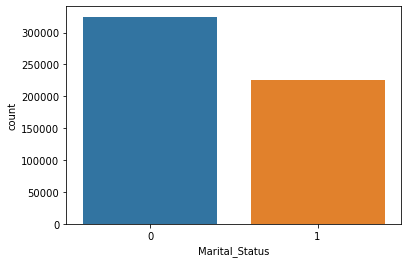

In [22]:
sns.countplot(data["Marital_Status"])

<AxesSubplot:xlabel='Gender'>

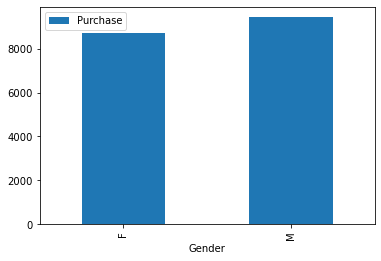

In [23]:
data[["Gender","Purchase"]].groupby("Gender").mean().sort_values(by=["Purchase"]).plot(kind="bar")

<AxesSubplot:xlabel='Age'>

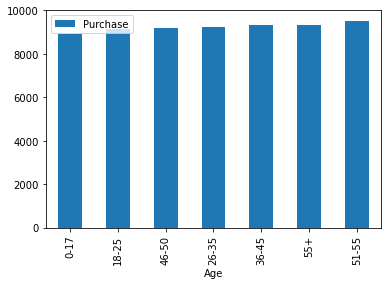

In [24]:
data[["Age","Purchase"]].groupby("Age").mean().sort_values(by=["Purchase"]).plot(kind="bar")

In [25]:
data[["Age","Purchase"]].groupby("Age").mean()
    

,Purchase
Age,
0-17,8933.464640
18-25,9169.663606
26-35,9252.690633
36-45,9331.350695
46-50,9208.625697
51-55,9534.808031
55+,9336.280459


<AxesSubplot:xlabel='Age'>

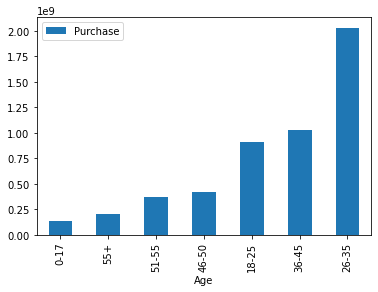

In [26]:
data[["Age","Purchase"]].groupby("Age").sum().sort_values(by=["Purchase"]).plot(kind="bar")

<AxesSubplot:xlabel='Occupation'>

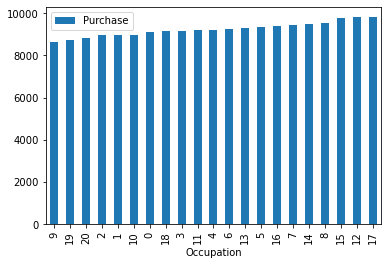

In [27]:
data[["Occupation","Purchase"]].groupby("Occupation").mean().sort_values(by=["Purchase"]).plot(kind="bar")

<AxesSubplot:xlabel='Occupation'>

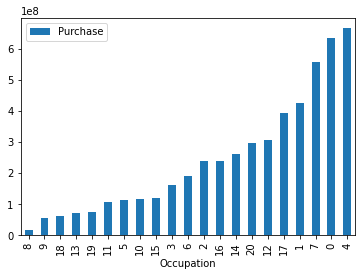

In [28]:
data[["Occupation","Purchase"]].groupby("Occupation").sum().sort_values(by=["Purchase"]).plot(kind="bar")

<AxesSubplot:xlabel='City_Category'>

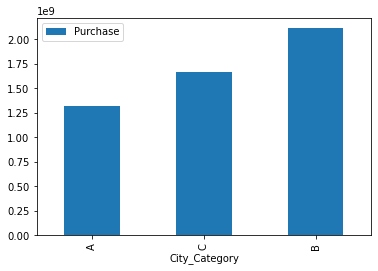

In [29]:
data[["City_Category","Purchase"]].groupby("City_Category").sum().sort_values(by=["Purchase"]).plot(kind="bar")

<AxesSubplot:xlabel='City_Category'>

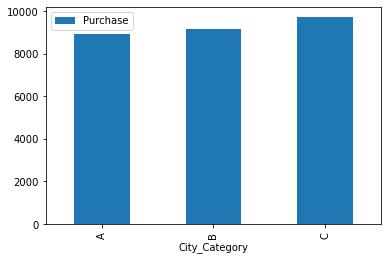

In [30]:
data[["City_Category","Purchase"]].groupby("City_Category").mean().sort_values(by=["Purchase"]).plot(kind="bar")

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

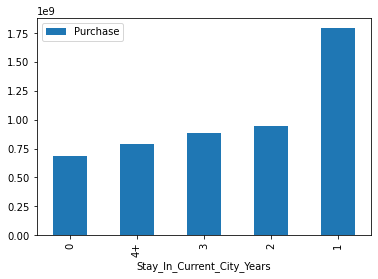

In [31]:
data[["Stay_In_Current_City_Years","Purchase"]].groupby("Stay_In_Current_City_Years").sum().sort_values(by=["Purchase"]).plot(kind="bar")

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

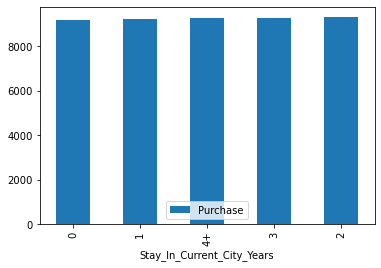

In [32]:
data[["Stay_In_Current_City_Years","Purchase"]].groupby("Stay_In_Current_City_Years").mean().sort_values(by=["Purchase"]).plot(kind="bar")

<AxesSubplot:xlabel='Marital_Status'>

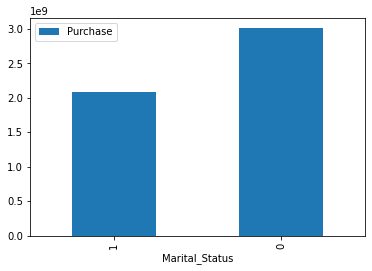

In [33]:
data[["Marital_Status","Purchase"]].groupby("Marital_Status").sum().sort_values(by=["Purchase"]).plot(kind="bar")

<AxesSubplot:xlabel='Marital_Status'>

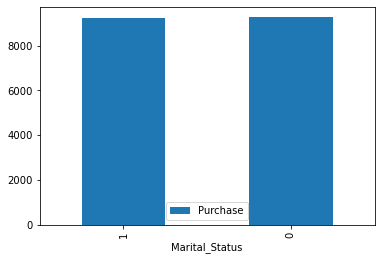

In [34]:
data[["Marital_Status","Purchase"]].groupby("Marital_Status").mean().sort_values(by=["Purchase"]).plot(kind="bar")

In [35]:
anova_test('data["Marital_Status"]','data["Purchase"]')

No relationship


In [36]:
data["Gender"]=data["Gender"].replace({"M":1,"F":0})

In [37]:
anova_test('data["Gender"]','data["Purchase"]')

Relationship exits


In [38]:
data["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [39]:
for i in data["Occupation"].unique():
    data["Occupation"]=data["Occupation"].replace({i:str(i)})

In [40]:
for i in data["Product_Category_1"].unique():
    data["Product_Category_1"]=data["Product_Category_1"].replace({i:str(i)})

In [41]:
data.drop("Stay_In_Current_City_Years",axis=1,inplace=True)

In [42]:
#One hot encoding | since we don't have any ordinal data
final=pd.get_dummies(data)

<AxesSubplot:>

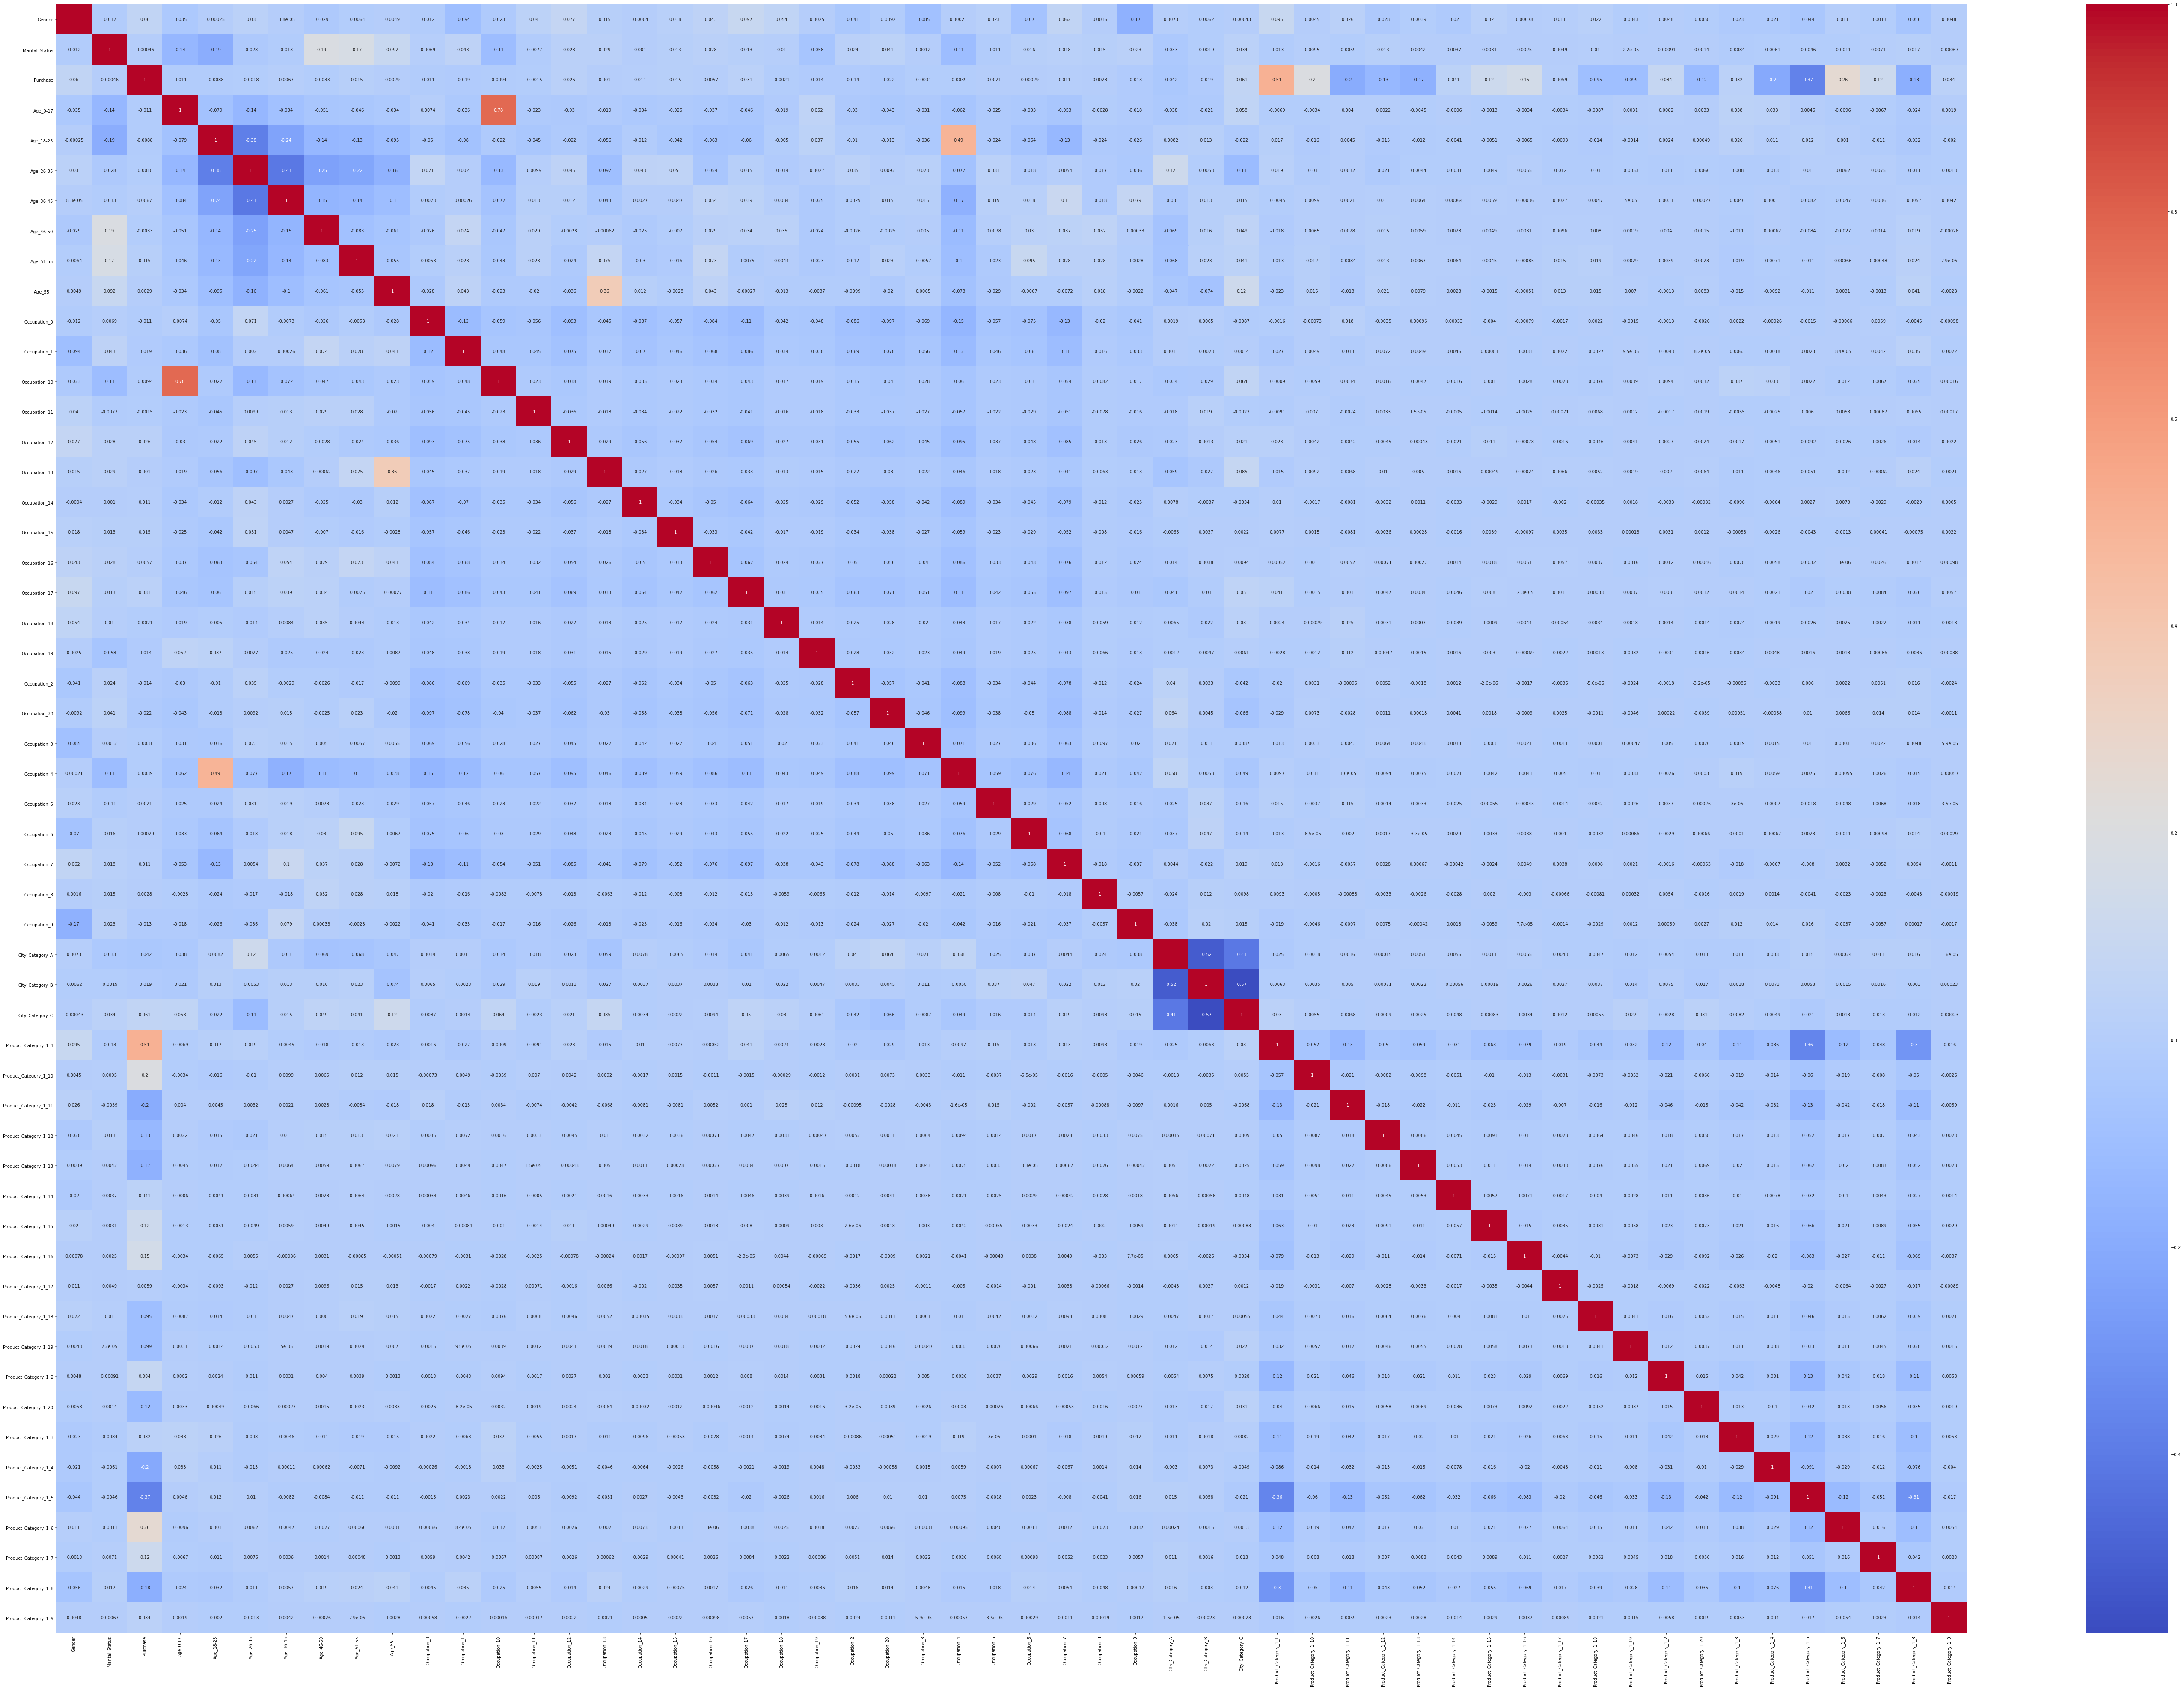

In [43]:
plt.figure(figsize=(100,70))
sns.heatmap(final.corr(),annot=True,cmap="coolwarm")

In [48]:
final.columns

Index(['Gender', 'Marital_Status', 'Purchase', 'Age_18-25', 'Age_26-35',
       'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+', 'Occupation_0',
       'Occupation_1', 'Occupation_10', 'Occupation_11', 'Occupation_12',
       'Occupation_13', 'Occupation_14', 'Occupation_15', 'Occupation_16',
       'Occupation_17', 'Occupation_18', 'Occupation_19', 'Occupation_2',
       'Occupation_20', 'Occupation_3', 'Occupation_4', 'Occupation_5',
       'Occupation_6', 'Occupation_7', 'Occupation_8', 'Occupation_9',
       'City_Category_A', 'City_Category_B', 'City_Category_C',
       'Product_Category_1_1', 'Product_Category_1_10',
       'Product_Category_1_11', 'Product_Category_1_12',
       'Product_Category_1_13', 'Product_Category_1_14',
       'Product_Category_1_15', 'Product_Category_1_16',
       'Product_Category_1_17', 'Product_Category_1_18',
       'Product_Category_1_19', 'Product_Category_1_2',
       'Product_Category_1_20', 'Product_Category_1_3', 'Product_Category_1_4',
    

In [49]:
vif_data = pd.DataFrame()
vif_data["feature"] = final.columns

In [46]:
#Dropping columns based on multicollinarity
final=final.drop(["Age_0-17","Occupation_10"],axis=1)

In [50]:
final

,Gender,Marital_Status,Purchase,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,...,Product_Category_1_19,Product_Category_1_2,Product_Category_1_20,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9
0,0,0,8370,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,15200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1422,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1057,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,7969,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,1,368,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
550064,0,0,371,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
550065,0,1,137,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
550066,0,0,365,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
x=final.drop("Purchase",axis=1)
y=final["Purchase"]

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [55]:
l=LinearRegression()
l.fit(x_train,y_train)
y_pred=l.predict(x_test)
print("Training score :",l.score(x_train,y_train))
print("Testing score :",l.score(x_test,y_test))
print("MSE :",mean_squared_error(y_test,y_pred))

Training score : 0.6401257070444601
Testing score : 0.6398720521569554
MSE : 9079880.678300034


In [56]:
d=DecisionTreeRegressor()
d.fit(x_train,y_train)
y_pred=d.predict(x_test)
print("Training score :",d.score(x_train,y_train))
print("Testing score :",d.score(x_test,y_test))
print("MSE :",mean_squared_error(y_test,y_pred))

Training score : 0.6683910700189756
Testing score : 0.6466127224773413
MSE : 8909928.630514128


In [57]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print("Training score :",xgb.score(x_train,y_train))
print("Testing score :",xgb.score(x_test,y_test))
print("MSE :",mean_squared_error(y_test,y_pred))

Training score : 0.6544075406834466
Testing score : 0.649666019586458
MSE : 8832946.064755969


In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
#Hyperparameter tuning
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 15)]
learning_rate = ['0.01', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']
min_child_weight = [int(x) for x in np.linspace(start = 45, stop = 70, num = 15)]

In [65]:
params = {
 "learning_rate"    : learning_rate,
 "max_depth"        : max_depth,
 "min_child_weight" : min_child_weight,
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
}

In [67]:
xgb_cv = RandomizedSearchCV(xgb, param_distributions = params, cv = 5, random_state = 42)

In [68]:
xgb_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          enable_categorical=False, gamma=0,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimato...
                                          subsample=1, tree_method='exact',
                                          validate_parameters=1,
       

In [69]:
xgb_cv.best_params_

{'min_child_weight': 53,
 'max_depth': 18,
 'learning_rate': '0.5',
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [73]:
xgb=XGBRegressor(min_child_weight=53,max_depth=18,learning_rate=0.5,gamma=0.3,colsample_bytree=0.5)

In [76]:
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print("Training score :",xgb.score(x_train,y_train))
print("Testing score :",xgb.score(x_test,y_test))
print("MSE :",mean_squared_error(y_test,y_pred))

Training score : 0.6615786431389717
Testing score : 0.6526463185559565
MSE : 8757803.995969625
